In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv


In [2]:
#Load in the data:

recovered = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv')
deaths = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')
confirmed = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
open_line_list = pd.read_csv('../input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv')
line_list = pd.read_csv('../input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv')
data = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')

In [3]:
#Take a look at what it looks like:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [4]:
#make a df that just has the latest numbers

recovered_latest = recovered[recovered['3/14/20']!=0].groupby('Country/Region').sum()
recovered_latest = recovered_latest.iloc[:,-1].sort_values(ascending = False)
recovered_latest = pd.DataFrame(recovered_latest)
recovered_latest.reset_index(inplace = True)
recovered_latest.head()

,Country/Region,3/14/20
0,China,65660
1,Iran,2959
2,Italy,1966
3,Spain,517
4,"Korea, South",510


In [5]:
confirmed_latest = confirmed[confirmed['3/14/20']!=0].groupby('Country/Region').sum()
confirmed_latest = confirmed_latest.iloc[:,-1].sort_values(ascending = False)
confirmed_latest = pd.DataFrame(confirmed_latest)
confirmed_latest.reset_index(inplace = True)
confirmed_latest.head()

,Country/Region,3/14/20
0,China,80977
1,Italy,21157
2,Iran,12729
3,"Korea, South",8086
4,Spain,6391


In [6]:
deaths_latest = deaths[deaths['3/14/20']!=0].groupby('Country/Region').sum()
deaths_latest = deaths_latest.iloc[:,-1].sort_values(ascending = False)
deaths_latest = pd.DataFrame(deaths_latest)
deaths_latest.reset_index(inplace = True)
deaths_latest.head()

,Country/Region,3/14/20
0,China,3193
1,Italy,1441
2,Iran,611
3,Spain,195
4,France,91


In [7]:
#Convert countries to country codes for plotting chloropleth:

from iso3166 import countries

def code_map(x):
    if x == 'Iran':
        x = 'Iran, Islamic Republic of'
    elif x == 'Korea, South':
        x = 'Korea, Republic of'
    elif x == 'United Kingdom':
        x = 'United Kingdom of Great Britain and Northern Ireland'
    elif x == 'Cruise Ship':
        return x
    elif x == 'Taiwan*':
        x = 'Taiwan, Province of China'
    elif x == 'Vietnam':
        x = 'Viet Nam'
    elif x == 'Russia':
        x = 'Russian Federation'
    elif x == 'Brunei':
        x = 'Brunei Darussalam'
    elif x == 'Moldova':
        x ='Moldova, Republic of'
    elif x == 'Bolivia':
        x = 'Bolivia, Plurinational State of'
    elif x == 'Reunion':
        x = 'Réunion'
    elif x == 'Congo (Kinshasa)':
        x = 'Congo'
    elif x == 'Venezuela':
        x = 'Venezuela, Bolivarian Republic of'
    elif x == 'Curacao':
        x = 'Curaçao'
    elif x == "Cote d'Ivoire":
        x = "Côte d'Ivoire"
    return countries.get(x).alpha3

deaths_latest['Code'] = deaths_latest['Country/Region'].apply(code_map)
recovered_latest['Code'] = recovered_latest['Country/Region'].apply(code_map)
confirmed_latest['Code'] = confirmed_latest['Country/Region'].apply(code_map)

In [8]:
import plotly.graph_objects as go

In [9]:
#Chloropleth plots:

data = dict(
        type = 'choropleth',
        locations = deaths_latest['Code'],
        colorscale = 'Jet',
        z = np.log10(deaths_latest['3/14/20']),
        text = deaths_latest['Country/Region'],
        colorbar=dict(title='Deaths', tickprefix='10^'),
      ) 
#colorbar=dict(title='Count (Log)', tickprefix='1.e')
#colorbar = {'title' : 'COVID-19 deaths'}
layout = dict(
    title = 'COVID-19 deaths',
    geo = dict(
        showframe = False,
        projection = {'type':'equirectangular'}
    )
)

choromap = go.Figure(data = [data],layout = layout)
#iplot(choromap)
choromap.show()

In [10]:
data2 = dict(
        type = 'choropleth',
        locations = confirmed_latest['Code'],
        colorscale = 'Jet',
        z = np.log10(confirmed_latest['3/14/20']),
        text = confirmed_latest['Country/Region'],
        colorbar=dict(title='Cases', tickprefix='10^'),
      ) 
#colorbar=dict(title='Count (Log)', tickprefix='1.e')
#colorbar = {'title' : 'COVID-19 deaths'}
layout2 = dict(
    title = 'COVID-19 cases',
    geo = dict(
        showframe = False,
        projection = {'type':'equirectangular'}
    )
)

choromap2 = go.Figure(data = [data2],layout = layout2)
#iplot(choromap)
choromap2.show()

In [11]:
data3 = dict(
        type = 'choropleth',
        locations = recovered_latest['Code'],
        colorscale = 'Jet',
        z = np.log10(recovered_latest['3/14/20']),
        text = recovered_latest['Country/Region'],
        colorbar=dict(title='Recoveries', tickprefix='10^'),
      ) 
#colorbar=dict(title='Count (Log)', tickprefix='1.e')
#colorbar = {'title' : 'COVID-19 deaths'}
layout3 = dict(
    title = 'COVID-19 recoveries',
    geo = dict(
        showframe = False,
        projection = {'type':'equirectangular'}
    )
)

choromap3 = go.Figure(data = [data3],layout = layout3)
#iplot(choromap)
choromap3.show()

In [12]:
#Look at just US cases:
confirmed_US = confirmed[confirmed['Country/Region']=='US']
confirmed_US = confirmed_US[confirmed_US['3/14/20']!= 0]
confirmed_US_latest = confirmed_US.iloc[:,[0,-1]]

In [13]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands, U.S.',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming',
        'DP': 'Diamond Princess',
        'GP': 'Grand Princess'
}

states2 = {}
for key in states:
    val = states[key]
    states2[val] = key

In [14]:
confirmed_US_latest['Code'] = confirmed_US_latest['Province/State'].copy().apply(lambda x: states2[x])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
data4 = dict(type='choropleth',
            locations = confirmed_US_latest['Code'],
            z = confirmed_US_latest['3/14/20'],
            locationmode = 'USA-states',
            text = confirmed_US_latest['Province/State'],
            colorbar = {'title':"Cases"}
            ) 

layout4 = dict(title = 'COVID-19 cases',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

choromap4 = go.Figure(data = [data4],layout = layout4)
choromap4.show()

In [16]:
deaths_latest.rename(columns = {'3/14/20':'Deaths'}, inplace = True)
confirmed_latest.rename(columns = {'3/14/20':'Cases'}, inplace = True)
recovered_latest.rename(columns = {'3/14/20':'Recoveries'}, inplace = True)

In [17]:
latest = pd.merge(deaths_latest, confirmed_latest, how = 'outer', on = ['Country/Region','Code'])
latest = pd.merge(latest, recovered_latest, how = 'outer', on = ['Country/Region','Code'] )
#latest.drop(columns = 'index', inplace = True)

In [18]:
latest = latest[['Country/Region','Code','Cases','Deaths','Recoveries']]
latest.fillna(value = 0, inplace = True)
latest.head()

,Country/Region,Code,Cases,Deaths,Recoveries
0,China,CHN,80977,3193.0,65660.0
1,Italy,ITA,21157,1441.0,1966.0
2,Iran,IRN,12729,611.0,2959.0
3,Spain,ESP,6391,195.0,517.0
4,France,FRA,4480,91.0,12.0


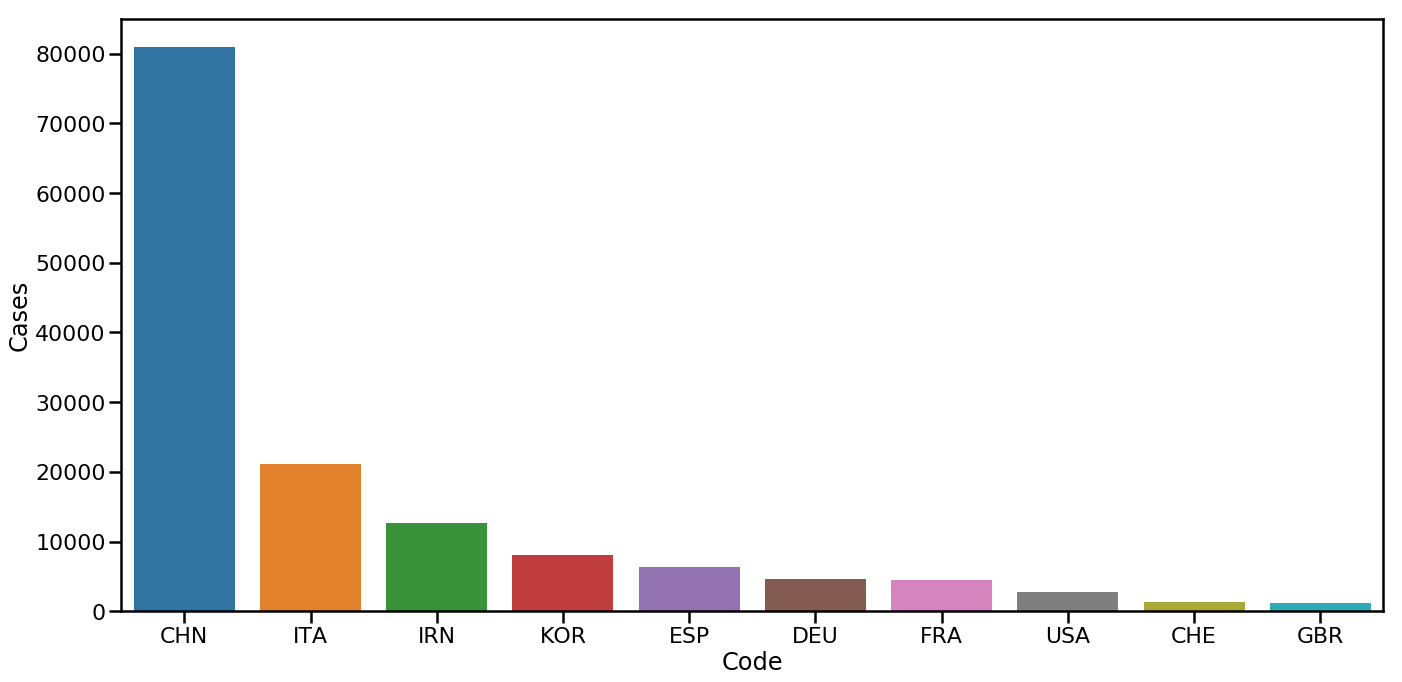

In [19]:
sns.set_context("poster")
fig = plt.figure(figsize = (20,10))
sns.barplot(x = latest.sort_values(by = 'Cases', ascending = False)['Code'][:10],
            y = latest.sort_values(by = 'Cases', ascending = False)['Cases'][:10])

plt.tight_layout()
                         

In [20]:
#Create df with just ten highest countries by confirmed cases:

topten = confirmed.groupby('Country/Region').sum().sort_values(by = '3/14/20', ascending = False)[:10].transpose()
top_rec = recovered.groupby('Country/Region').sum().sort_values(by = '3/14/20', ascending = False).transpose()
top_death = deaths.groupby('Country/Region').sum().sort_values(by = '3/14/20', ascending = False).transpose()

In [21]:
topten.drop(['Lat', 'Long'], axis = 0, inplace = True)
top_rec.drop(['Lat', 'Long'], axis = 0, inplace = True)
top_death.drop(['Lat', 'Long'], axis = 0, inplace = True)

In [22]:
topten.rename(columns = {'Korea, South': 'South Korea'}, inplace = True)
top_rec.rename(columns = {'Korea, South': 'South Korea'}, inplace = True)
top_death.rename(columns = {'Korea, South': 'South Korea'}, inplace = True)
new_cases = topten.diff()
topten.reset_index(inplace = True)
top_rec.reset_index(inplace = True)
top_death.reset_index(inplace = True)


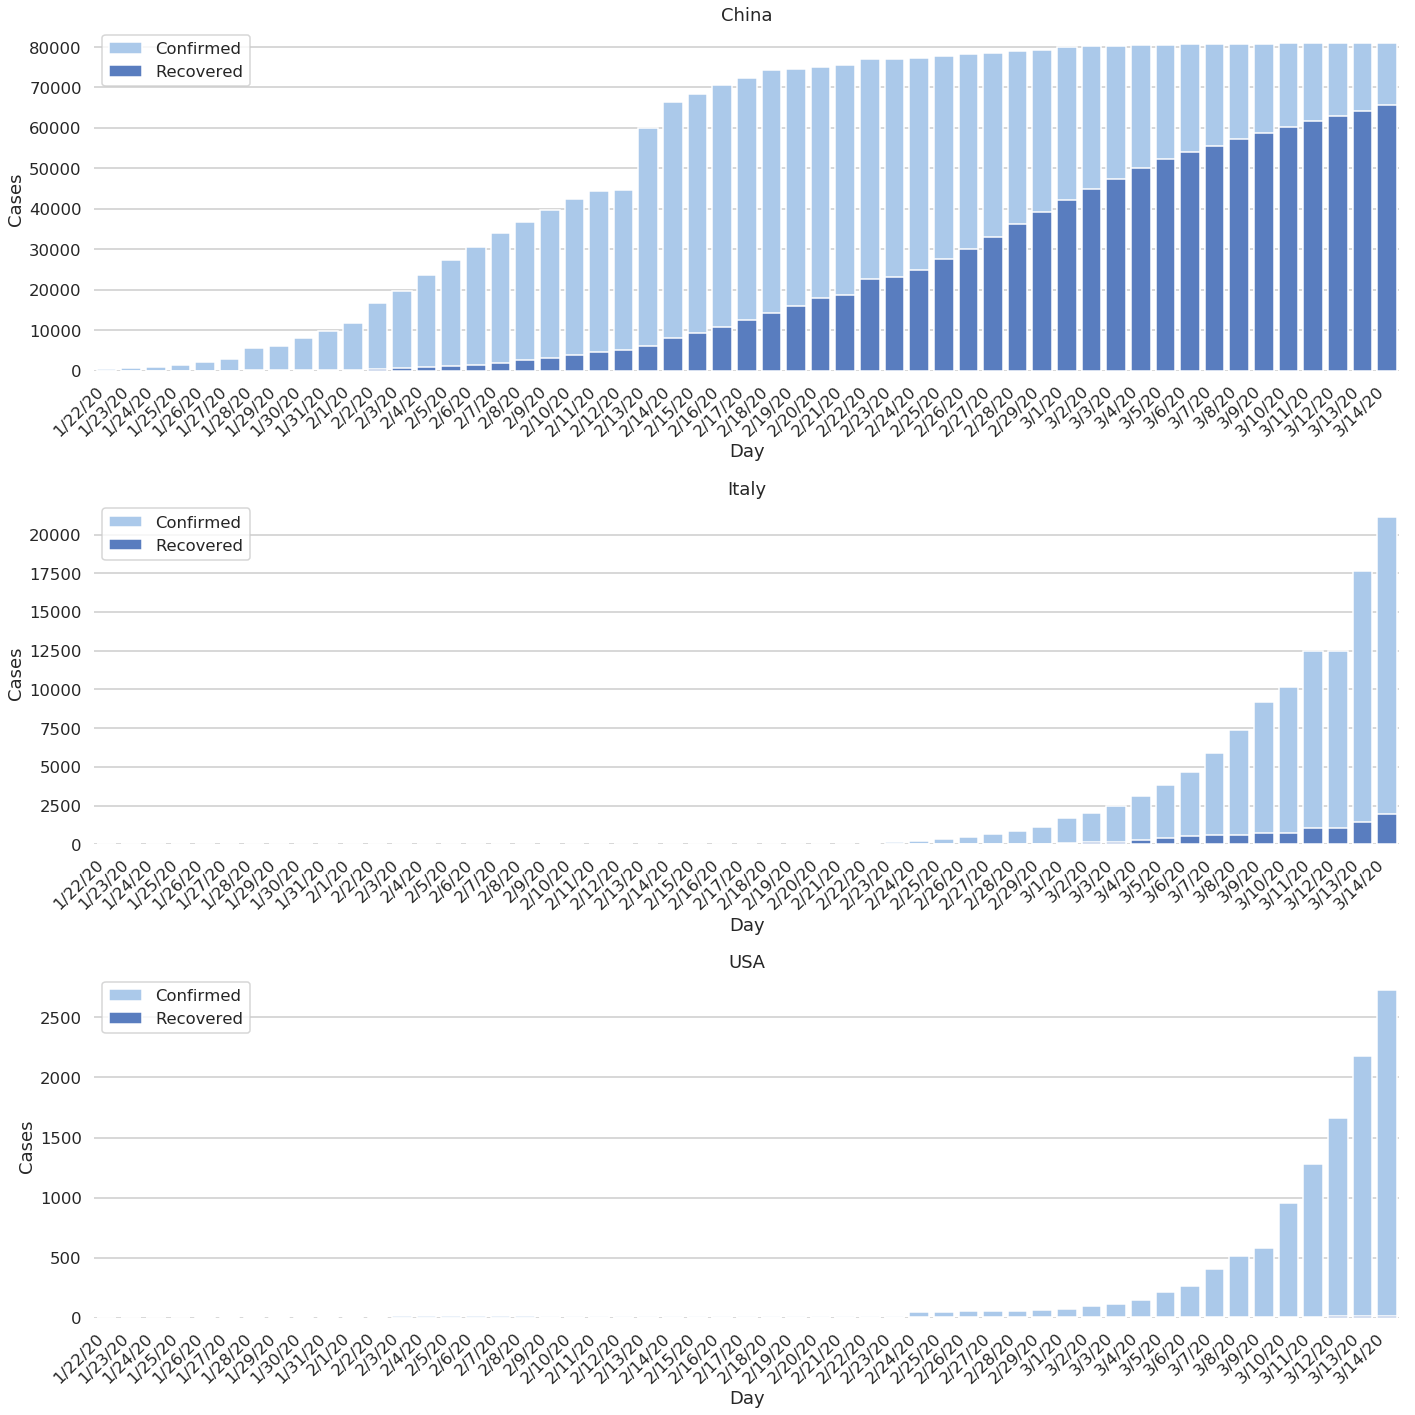

In [23]:
sns.set(style="whitegrid")
sns.set_context("talk")
# Initialize the matplotlib figure
f, ax = plt.subplots(3,1, figsize=(20, 20))


sns.set_color_codes("pastel")
sns.barplot(x="index", y="China", data=topten, ax = ax[0],
            label="Confirmed", color="b")


sns.set_color_codes("muted")
sns.barplot(x="index", y="China", data=top_rec, ax = ax[0],
            label="Recovered", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="index", y="Italy", data=topten, ax = ax[1],
            label="Confirmed", color="b")

sns.set_color_codes("muted")
sns.barplot(x="index", y="Italy", data=top_rec, ax = ax[1],
            label="Recovered", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="index", y="US", data=topten, ax = ax[2],
            label="Confirmed", color="b")

sns.set_color_codes("muted")
sns.barplot(x="index", y="US", data=top_rec, ax = ax[2],
            label="Recovered", color="b")

ax[0].legend(ncol=1, loc="upper left", frameon=True)
sns.despine(left=True, bottom=True)
ax[0].set(ylabel="Cases",xlabel="Day", title = "China")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')

ax[1].legend(ncol=1, loc="upper left", frameon=True)
sns.despine(left=True, bottom=True)
ax[1].set(ylabel="Cases",xlabel="Day", title = "Italy")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')

ax[2].legend(ncol=1, loc="upper left", frameon=True)
sns.despine(left=True, bottom=True)
ax[2].set(ylabel="Cases",xlabel="Day", title = "USA")
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
f.show()

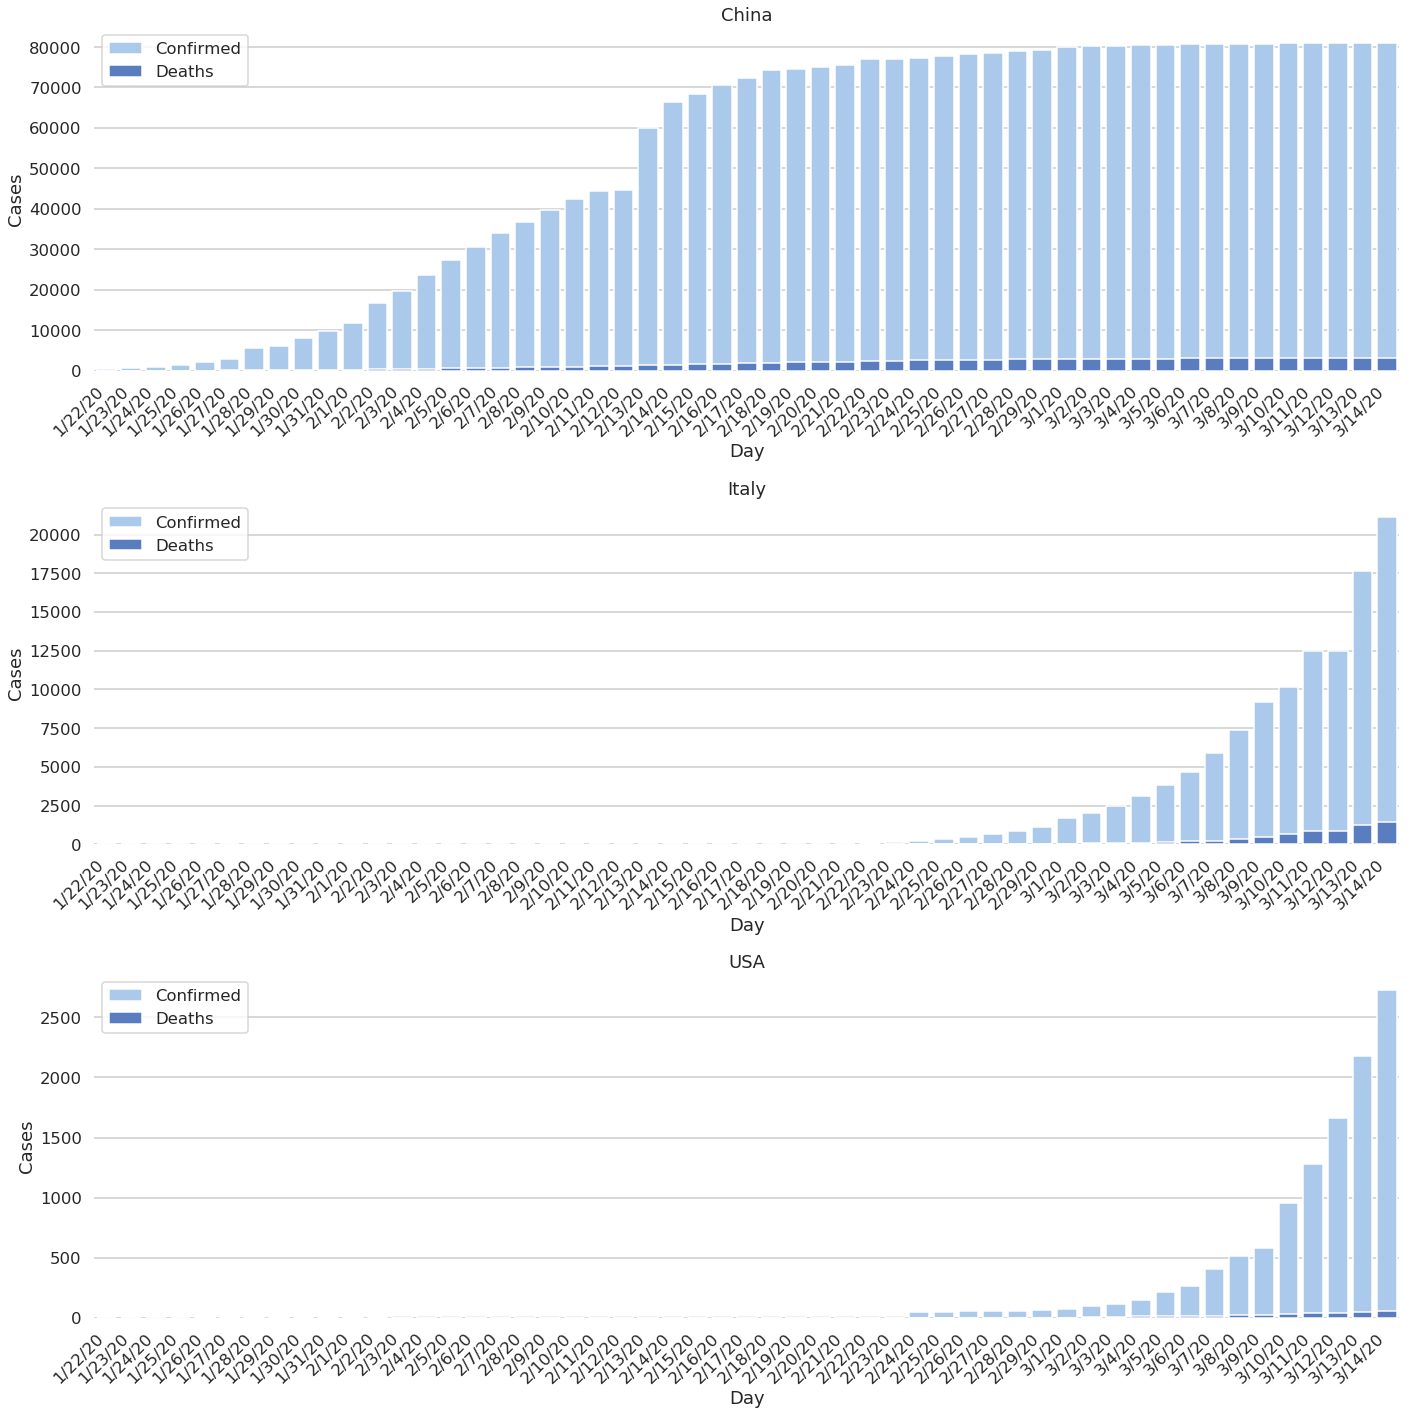

In [24]:
sns.set(style="whitegrid")
sns.set_context("talk")
# Initialize the matplotlib figure
f, ax = plt.subplots(3,1, figsize=(20, 20))


sns.set_color_codes("pastel")
sns.barplot(x="index", y="China", data=topten, ax = ax[0],
            label="Confirmed", color="b")


sns.set_color_codes("muted")
sns.barplot(x="index", y="China", data=top_death, ax = ax[0],
            label="Deaths", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="index", y="Italy", data=topten, ax = ax[1],
            label="Confirmed", color="b")

sns.set_color_codes("muted")
sns.barplot(x="index", y="Italy", data=top_death, ax = ax[1],
            label="Deaths", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="index", y="US", data=topten, ax = ax[2],
            label="Confirmed", color="b")

sns.set_color_codes("muted")
sns.barplot(x="index", y="US", data=top_death, ax = ax[2],
            label="Deaths", color="b")

ax[0].legend(ncol=1, loc="upper left", frameon=True)
sns.despine(left=True, bottom=True)
ax[0].set(ylabel="Cases",xlabel="Day", title = "China")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')

ax[1].legend(ncol=1, loc="upper left", frameon=True)
sns.despine(left=True, bottom=True)
ax[1].set(ylabel="Cases",xlabel="Day", title = "Italy")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')

ax[2].legend(ncol=1, loc="upper left", frameon=True)
sns.despine(left=True, bottom=True)
ax[2].set(ylabel="Cases",xlabel="Day", title = "USA")
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
f.show()

In [25]:
#Compare different countries when their outbreaks first started: adjust for lag

lag_df = topten[['index','China','Italy','South Korea','Iran','US']].copy()
lag_df['China'] = lag_df['China'].shift(8)
lag_df['Italy'] = lag_df['Italy'].shift(-29)
lag_df['South Korea'] = lag_df['South Korea'].shift(-26)
lag_df['US'] = lag_df['US'].shift(-40)
lag_df['Iran'] = lag_df['Iran'].shift(-31)

In [26]:
melted = pd.melt(lag_df[:20], id_vars="index", var_name="country", value_name="Confirmed")

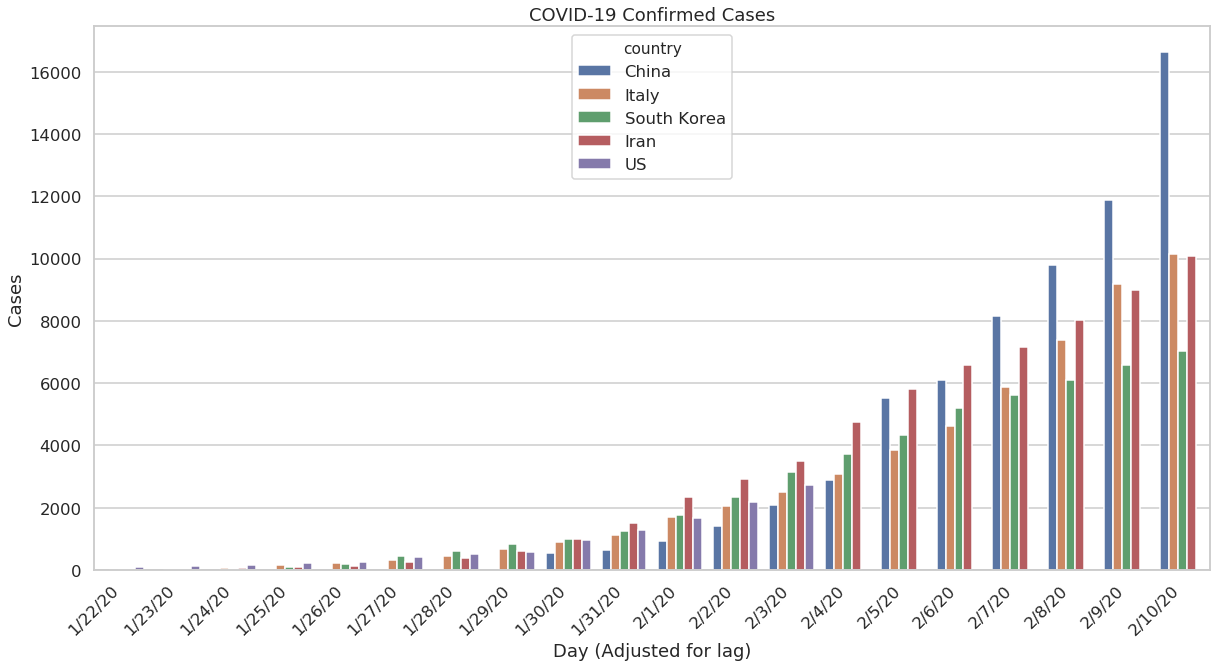

In [27]:
g, axr = plt.subplots(1,1, figsize=(20, 10))
sns.barplot(x='index', y='Confirmed', hue='country', data=melted, ax = axr)
axr.set(ylabel="Cases",xlabel="Day (Adjusted for lag)", title = "COVID-19 Confirmed Cases")
axr.set_xticklabels(axr.get_xticklabels(), rotation=45, horizontalalignment='right')
g.show()

In [28]:
#The USA is on track with China to head for 100,000s of cases, maybe more with the lack of testing.
#South Korea, which has testing, is already flattening the curve.